### Caricamento istogrammi di training

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def print_precision_recall(labels, preds):
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, preds)))
    print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))
    print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))
    print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import funzioni as fz
def print_cm(labels, preds):
    classes = ['Noise', 'Signal']
    cm=confusion_matrix(labels, preds)
    fz.plot_confusion_matrix(cm,target_names=classes, normalize=False,)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import uproot4
import tensorflow as tf
keras = tf.keras
from tensorflow.keras.layers import Conv1D, Activation, GlobalAveragePooling1D, MaxPooling1D, AveragePooling1D, Dropout, Dense, Lambda, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from livelossplot import PlotLossesKerasTF

In [2]:
hists=pd.read_pickle('histograms.pkl')

In [3]:
hists.head(10)

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,768,769
0,25791,25773,25742,25782,25782,25773,25791,25787,25769,25773,...,25751,25742,25778,25787,25760,25769,25782,25769,25769,0
1,25755,25782,25769,25791,25746,25782,25787,25778,25755,25800,...,25769,25778,25809,25764,25796,25791,25805,25737,25742,0
2,25791,25805,25796,25800,25787,25827,25764,25796,25814,25778,...,25791,25823,25805,25800,25778,25778,25805,25800,25778,0
3,25778,25809,25742,25773,25805,25800,25791,25760,25796,25800,...,25805,25760,25787,25769,25782,25787,25764,25773,25778,0
4,25805,25796,25773,25782,25764,25760,25755,25773,25773,25724,...,25751,25764,25782,25800,25769,25778,25773,25764,25769,0
5,25755,25715,25764,25737,25724,25737,25742,25773,25724,25719,...,25697,25755,25724,25724,25706,25724,25742,25755,25773,0
6,25773,25769,25751,25760,25751,25746,25737,25746,25746,25764,...,25728,25737,25782,25733,25742,25782,25742,25778,25755,0
7,25755,25751,25791,25737,25760,25737,25791,25755,25751,25787,...,25760,25760,25737,25742,25746,25787,25742,25751,25746,0
8,25800,25764,25755,25782,25764,25764,25796,25746,25782,25755,...,25760,25782,25769,25769,25778,25746,25751,25764,25773,0
9,25796,25769,25787,25782,25764,25791,25764,25773,25778,25742,...,25778,25787,25787,25769,25769,25764,25796,25769,25791,0


In [4]:
hists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Columns: 770 entries, 0 to 769
dtypes: int64(770)
memory usage: 12.6 MB


In [5]:
hists[769].value_counts()

1    1201
0     948
Name: 769, dtype: int64

In [6]:
X=hists.iloc[:,0:769]
y=hists.iloc[:,769]

In [7]:
X.shape

(2149, 769)

In [8]:
y.shape

(2149,)

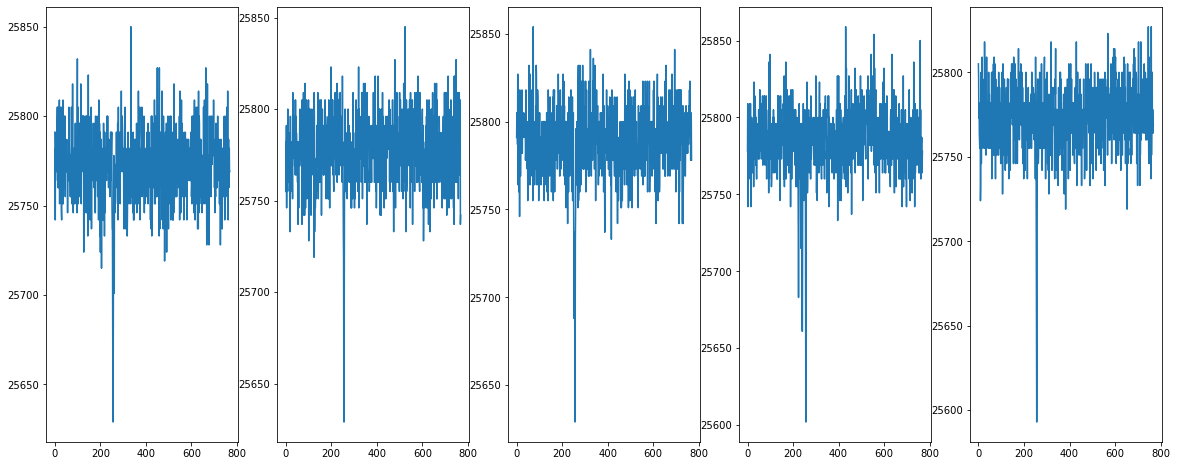

In [9]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 0):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

In [10]:
scaler1 = preprocessing.MinMaxScaler()

In [11]:
X = pd.DataFrame(data = scaler1.fit_transform(X.values.T).T, columns = X.columns)

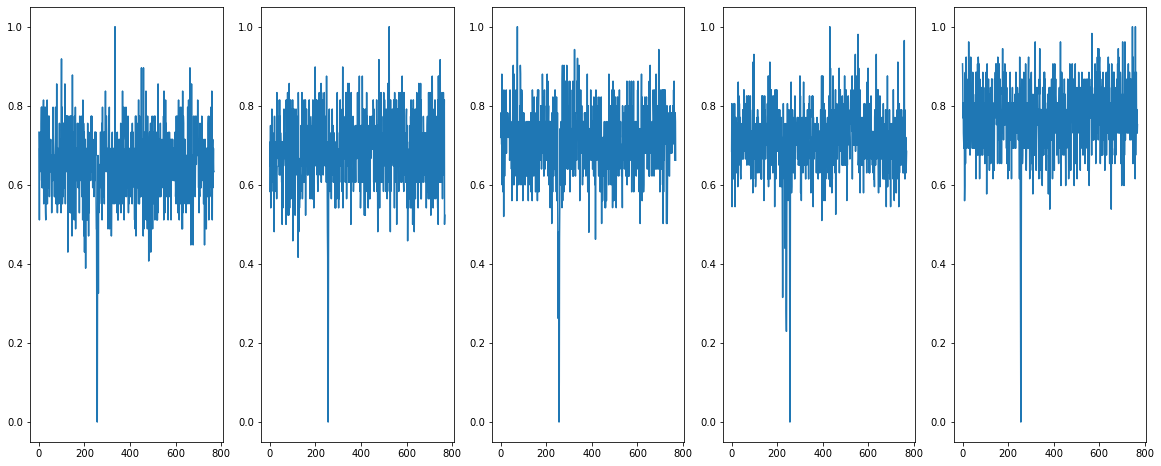

In [12]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 0):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

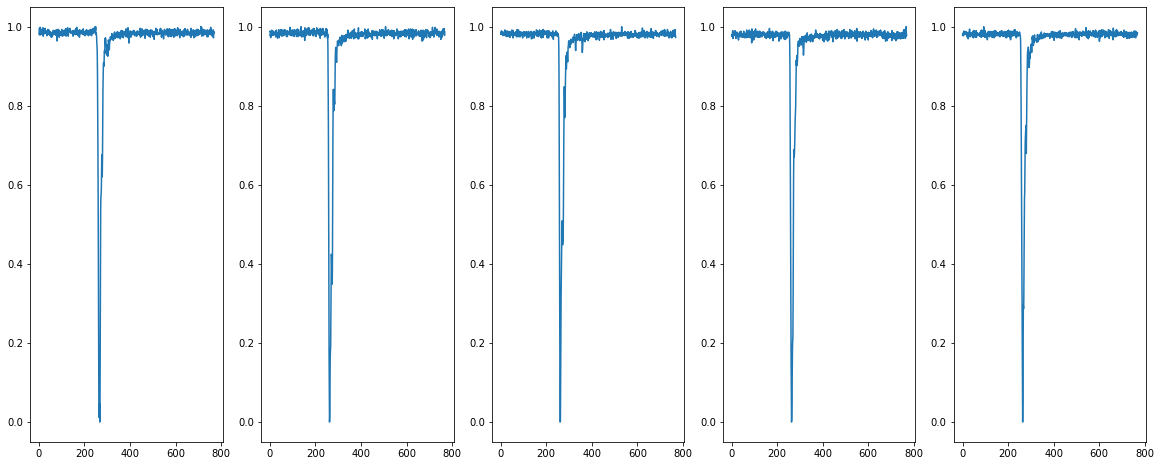

In [13]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2149):
    if (y[isto] == 1):
        plt.subplot(index)
        plt.plot(X.loc[isto])
        index+=1
        count+=1
    if count==limit: break

### Caricamento istogrammi di test indipendente (shifted 100)

In [14]:
scaled_positive = uproot4.open("positivi_shifted_100.root")

len y  822
len y  807
len y  872
len y  829
len y  817


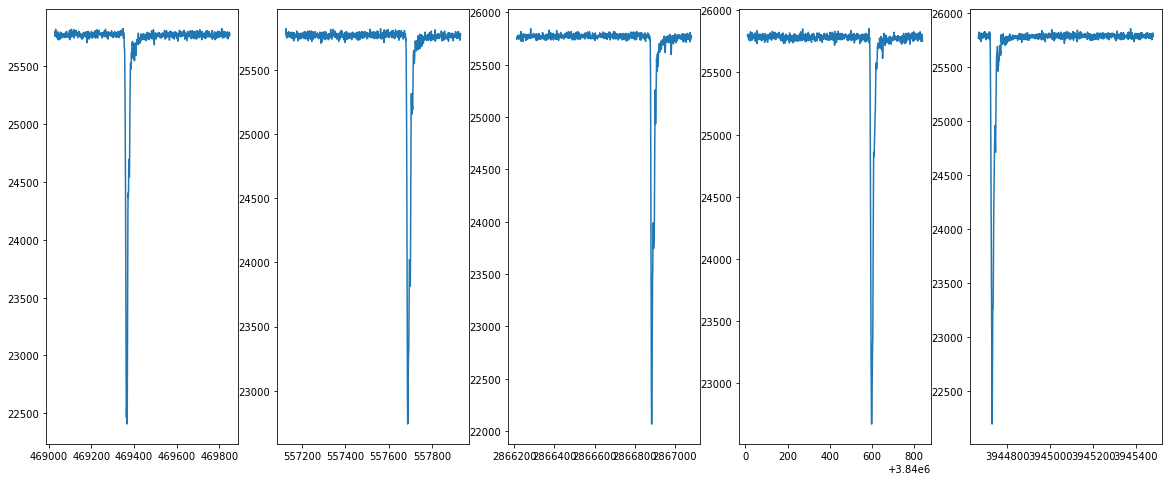

In [15]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for item in scaled_positive.classnames():
    hist=scaled_positive[item]
    X_scaled=hist.to_numpy()[1]
    y_scaled=hist.to_numpy()[0]
    plt.subplot(index)
    plt.plot(X_scaled[:-1],y_scaled)
    print('len y ', len(y_scaled))
    index+=1
    count+=1
    if count==limit: break

In [16]:
list_of_hist = []
for item in scaled_positive.classnames():
    y_scaled=scaled_positive[item].to_numpy()[0]
    list_of_hist.append(y_scaled[0:769])

In [17]:
len(list_of_hist)

1201

In [18]:
scaled_positive=pd.DataFrame(list_of_hist, index=None)

In [19]:
scaled_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Columns: 769 entries, 0 to 768
dtypes: int64(769)
memory usage: 7.0 MB


In [20]:
scaler2 = preprocessing.MinMaxScaler()
scaled_positive = pd.DataFrame(data = scaler2.fit_transform(scaled_positive.values.T).T, columns = scaled_positive.columns)

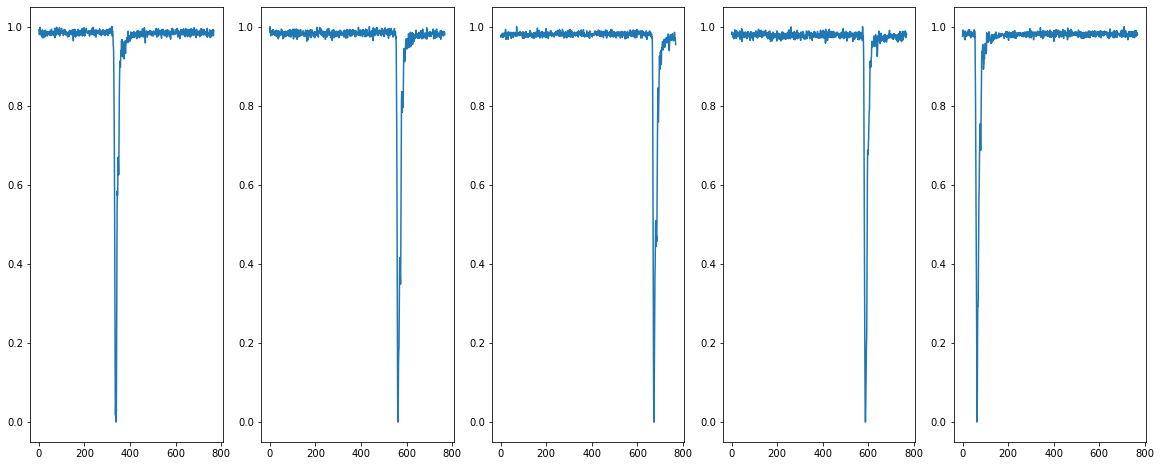

In [21]:
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2000):
    plt.subplot(index)
    plt.plot(scaled_positive.loc[isto])
    index+=1
    count+=1
    if count==limit: break

### DNN per la classificazione

In [22]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size = 0.10, random_state = 42, shuffle=True,stratify=y)

In [23]:
train_set, val_set, train_labels, val_labels = train_test_split(train_set, train_labels, test_size = 0.20, random_state = 42, stratify = train_labels)

In [24]:
def build_baseline_model():
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    filters = 80
    kernel_size=200
    subsample_length = 2
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=256,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=128,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

### Training della rete di baseline

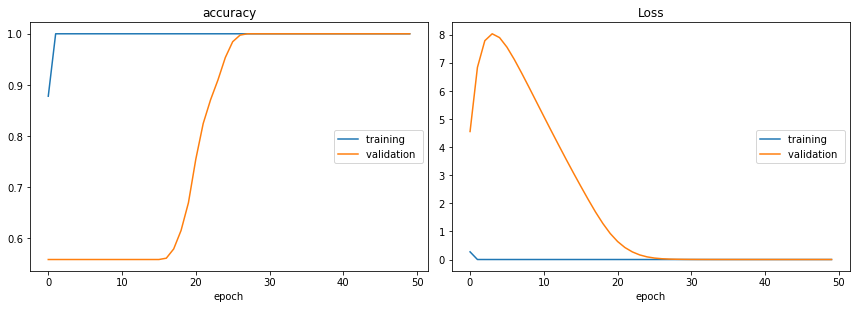

accuracy
	training         	 (min:    0.878, max:    1.000, cur:    1.000)
	validation       	 (min:    0.558, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.273, cur:    0.000)
	validation       	 (min:    0.000, max:    8.031, cur:    0.000)
1547/1547 [==============================] - 1s 327us/sample - loss: 1.3452e-05 - accuracy: 1.0000 - val_loss: 1.4308e-05 - val_accuracy: 1.0000


In [25]:
model=build_baseline_model()
plotlosses = PlotLossesKerasTF()
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
model_checkpoint = keras.callbacks.ModelCheckpoint("script_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)

history = model.fit(train_set.values, train_labels.values, batch_size = 200, verbose = 1, epochs=50, validation_data=(val_set.values, val_labels.values), callbacks=[plotlosses, model_checkpoint, early_stopping], shuffle=True)

model = keras.models.load_model("script_checkpoint.h5")

In [26]:
pred_labels = model.predict(test_set.values)

In [27]:
pred_labels = (pred_labels > 0.5)

In [28]:
print_precision_recall(test_labels,pred_labels)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


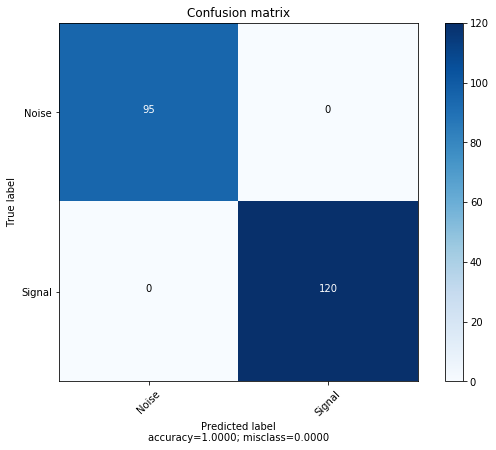

In [29]:
print_cm(test_labels,pred_labels)

In [30]:
print(confusion_matrix(test_labels, pred_labels))

[[ 95   0]
 [  0 120]]


### Test sugli shifted

In [31]:
pred_labels = model.predict(scaled_positive.values)
pred_labels = (pred_labels > 0.5)

In [32]:
scaled_labels=np.ones(1201)

In [33]:
print_precision_recall(scaled_labels,pred_labels)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


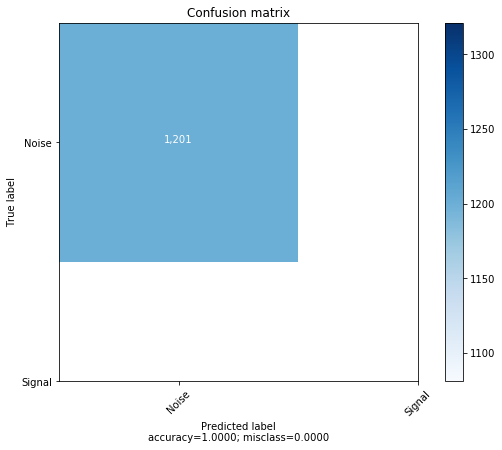

In [34]:
print_cm(scaled_labels,pred_labels)

In [35]:
scaled_labels

array([1., 1., 1., ..., 1., 1., 1.])

In [36]:
pred_labels

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

### Quindi non ci sono effetti di shortcut learning... Proviamo con shifted scalati a 25

len y  822
len y  807
len y  872
len y  829
len y  817


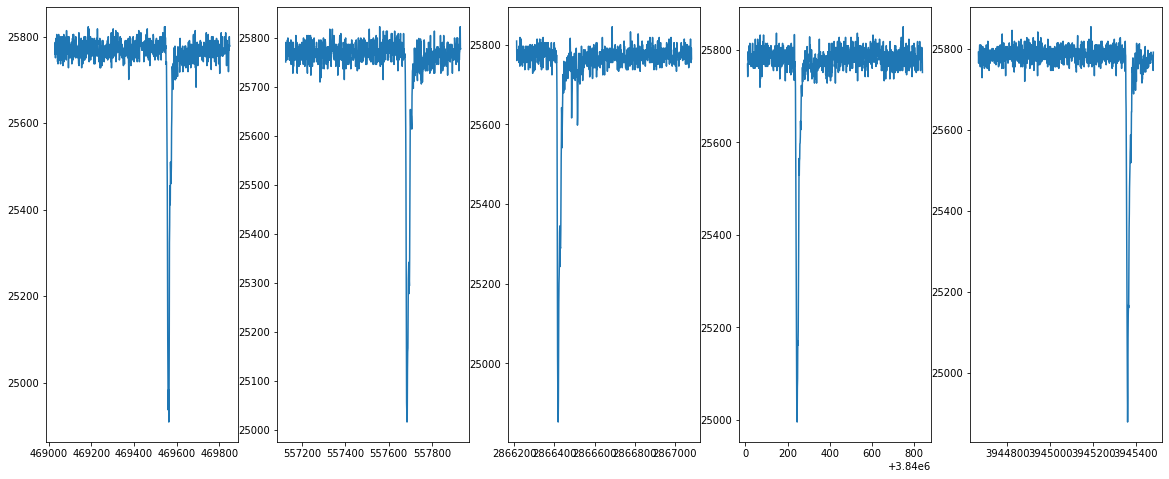

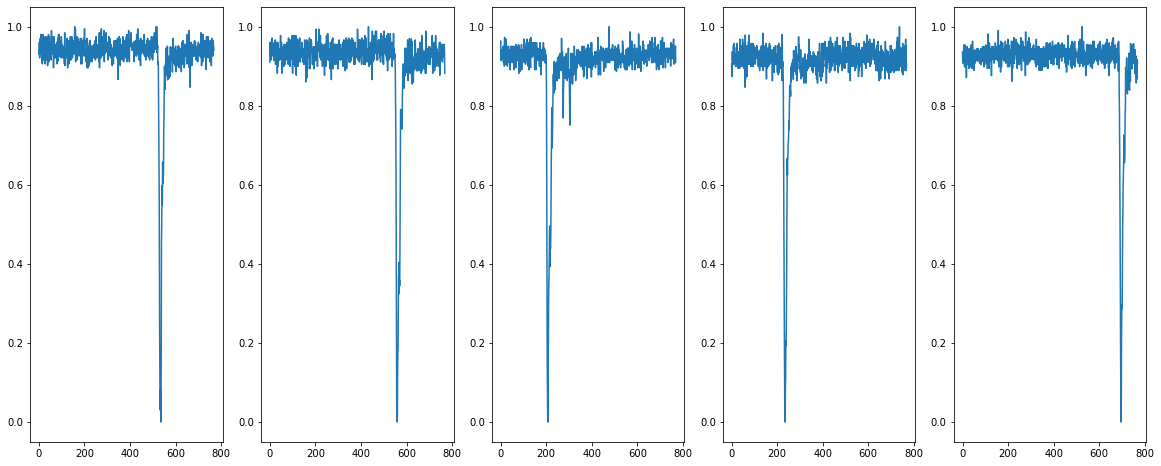

In [37]:
scaled_positive = uproot4.open("positivi_shifted_25.root")
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for item in scaled_positive.classnames():
    hist=scaled_positive[item]
    X_scaled=hist.to_numpy()[1]
    y_scaled=hist.to_numpy()[0]
    plt.subplot(index)
    plt.plot(X_scaled[:-1],y_scaled)
    print('len y ', len(y_scaled))
    index+=1
    count+=1
    if count==limit: break

list_of_hist = []
for item in scaled_positive.classnames():
    y_scaled=scaled_positive[item].to_numpy()[0]
    list_of_hist.append(y_scaled[0:769])

scaled_positive=pd.DataFrame(list_of_hist, index=None)

scaler2 = preprocessing.MinMaxScaler()
scaled_positive = pd.DataFrame(data = scaler2.fit_transform(scaled_positive.values.T).T, columns = scaled_positive.columns)
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2000):
    plt.subplot(index)
    plt.plot(scaled_positive.loc[isto])
    index+=1
    count+=1
    if count==limit: break


Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.50
Macro Recall: 0.50
Macro F1-score: 0.50

Weighted Precision: 1.00
Weighted Recall: 0.99
Weighted F1-score: 1.00


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


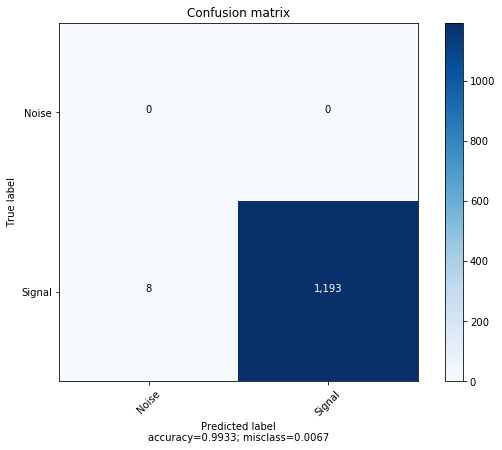

In [38]:
pred_labels = model.predict(scaled_positive.values)
pred_labels = (pred_labels > 0.5)
print_precision_recall(scaled_labels,pred_labels)
print_cm(scaled_labels,pred_labels)

### C'è errore su 8. Provo a ottimizzare la rete

In [39]:
#aumentare il numero di strati peggiora, così come aumentare le epoche. Overfitting? 
#Questa la rete finale con prove "a mano"
def build_improved_model():
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1024,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

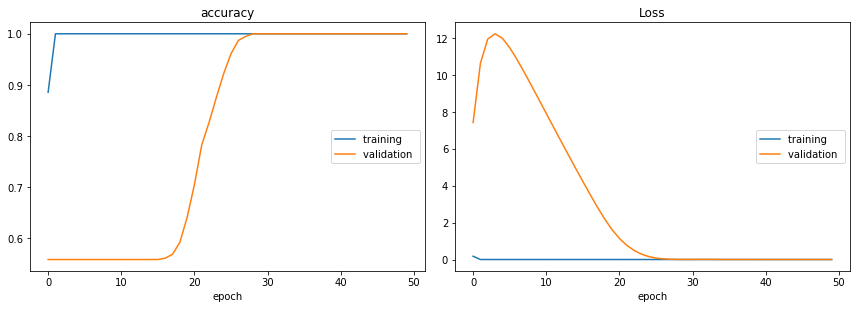

accuracy
	training         	 (min:    0.886, max:    1.000, cur:    1.000)
	validation       	 (min:    0.558, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.177, cur:    0.000)
	validation       	 (min:    0.000, max:   12.226, cur:    0.000)
1547/1547 [==============================] - 0s 313us/sample - loss: 2.4545e-10 - accuracy: 1.0000 - val_loss: 2.3820e-08 - val_accuracy: 1.0000

Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 0.50
Macro Recall: 0.50
Macro F1-score: 0.50

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


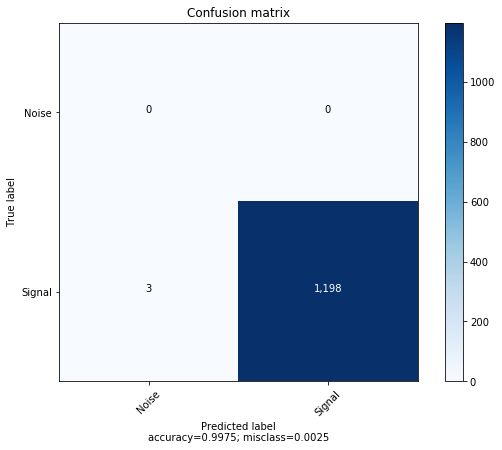

In [40]:
model=build_improved_model()
plotlosses = PlotLossesKerasTF()
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
model_checkpoint = keras.callbacks.ModelCheckpoint("script_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)

history = model.fit(train_set.values, train_labels.values, batch_size = 200, verbose = 1, epochs=50, validation_data=(val_set.values, val_labels.values), callbacks=[plotlosses, model_checkpoint, early_stopping], shuffle=True)

model = keras.models.load_model("script_checkpoint.h5")

pred_labels = model.predict(scaled_positive.values)
pred_labels = (pred_labels > 0.5)
print_precision_recall(scaled_labels,pred_labels)
print_cm(scaled_labels,pred_labels)

### Migliorato. Però forse val la pena di provare un gridsearchCV? Ottimizzo i parametri

In [41]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_improved_model, verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(train_set.values, train_labels.values)

In [42]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'batch_size': 10, 'epochs': 10}
1.000000 (0.000000) with: {'batch_size': 10, 'epochs': 10}
0.810724 (0.258144) with: {'batch_size': 10, 'epochs': 50}
0.823643 (0.249406) with: {'batch_size': 10, 'epochs': 100}
1.000000 (0.000000) with: {'batch_size': 20, 'epochs': 10}
0.933333 (0.094281) with: {'batch_size': 20, 'epochs': 50}
0.897287 (0.142526) with: {'batch_size': 20, 'epochs': 100}
0.967700 (0.045679) with: {'batch_size': 40, 'epochs': 10}
1.000000 (0.000000) with: {'batch_size': 40, 'epochs': 50}
1.000000 (0.000000) with: {'batch_size': 40, 'epochs': 100}
0.911477 (0.085497) with: {'batch_size': 60, 'epochs': 10}
1.000000 (0.000000) with: {'batch_size': 60, 'epochs': 50}
0.801942 (0.280097) with: {'batch_size': 60, 'epochs': 100}
0.563047 (0.024686) with: {'batch_size': 80, 'epochs': 10}
1.000000 (0.000000) with: {'batch_size': 80, 'epochs': 50}
1.000000 (0.000000) with: {'batch_size': 80, 'epochs': 100}
0.559169 (0.026804) with: {'batch_size': 100, 'epochs': 

In [51]:
def build_improved_model(optimizer='adam'):
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1024,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
#    optimizer = SGD(lr=learn_rate, momentum=momentum)
#    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=build_improved_model, epochs=50, batch_size=100, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(train_set.values, train_labels.values)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'optimizer': 'SGD'}
1.000000 (0.000000) with: {'optimizer': 'SGD'}
1.000000 (0.000000) with: {'optimizer': 'RMSprop'}
1.000000 (0.000000) with: {'optimizer': 'Adagrad'}
0.995474 (0.000919) with: {'optimizer': 'Adadelta'}
1.000000 (0.000000) with: {'optimizer': 'Adam'}
1.000000 (0.000000) with: {'optimizer': 'Adamax'}
1.000000 (0.000000) with: {'optimizer': 'Nadam'}


In [54]:
def build_improved_model(learn_rate=0.01, momentum=0):
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1024,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    optimizer = keras.optimizers.SGD(lr=learn_rate, momentum=momentum)
#    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=build_improved_model, epochs=50, batch_size=100, verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(train_set.values, train_labels.values)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'learn_rate': 0.001, 'momentum': 0.0}
1.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.0}
1.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.2}
1.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.4}
1.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.6}
1.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.8}
1.000000 (0.000000) with: {'learn_rate': 0.001, 'momentum': 0.9}
1.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.0}
1.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.2}
1.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.4}
1.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.6}
1.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.8}
1.000000 (0.000000) with: {'learn_rate': 0.01, 'momentum': 0.9}
1.000000 (0.000000) with: {'learn_rate': 0.1, 'momentum': 0.0}
1.000000 (0.000000) with: {'learn_rate': 0.1, 'momentum': 0.2}
1.000000 (0.000000) with: {'learn_rate':

In [55]:
def build_improved_model(init_mode='uniform'):
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', kernel_initializer=init_mode,input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1024,kernel_initializer=init_mode, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, kernel_initializer=init_mode,activation='sigmoid'))
    optimizer = keras.optimizers.SGD(lr=0.3, momentum=0.9)
#    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=build_improved_model, epochs=50, batch_size=100, verbose=0)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(train_set.values, train_labels.values)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'init_mode': 'uniform'}
1.000000 (0.000000) with: {'init_mode': 'uniform'}
1.000000 (0.000000) with: {'init_mode': 'lecun_uniform'}
1.000000 (0.000000) with: {'init_mode': 'normal'}
0.559169 (0.026804) with: {'init_mode': 'zero'}
1.000000 (0.000000) with: {'init_mode': 'glorot_normal'}
1.000000 (0.000000) with: {'init_mode': 'glorot_uniform'}
0.997411 (0.003661) with: {'init_mode': 'he_normal'}
0.875969 (0.175406) with: {'init_mode': 'he_uniform'}


In [57]:
def build_improved_model(neurons=1):
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', kernel_initializer='uniform',input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=neurons,kernel_initializer='uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    optimizer = keras.optimizers.SGD(lr=0.3, momentum=0.9)
#    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

model = KerasClassifier(build_fn=build_improved_model, epochs=50, batch_size=100, verbose=0)
neurons = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(train_set.values, train_labels.values)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'neurons': 16}
1.000000 (0.000000) with: {'neurons': 16}
0.999354 (0.000914) with: {'neurons': 32}
0.976098 (0.033802) with: {'neurons': 64}
0.823643 (0.249406) with: {'neurons': 128}
0.823643 (0.249406) with: {'neurons': 256}
1.000000 (0.000000) with: {'neurons': 512}
1.000000 (0.000000) with: {'neurons': 1024}
1.000000 (0.000000) with: {'neurons': 2048}
1.000000 (0.000000) with: {'neurons': 4096}


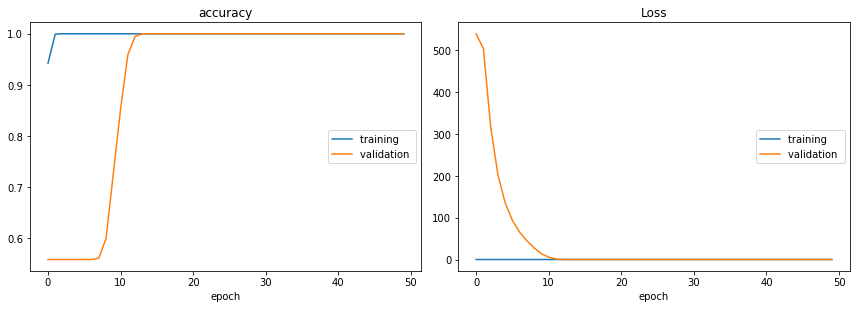

accuracy
	training         	 (min:    0.942, max:    1.000, cur:    1.000)
	validation       	 (min:    0.558, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.070, cur:    0.000)
	validation       	 (min:    0.000, max:  539.349, cur:    0.000)
1547/1547 [==============================] - 1s 355us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 0.50
Macro Recall: 0.50
Macro F1-score: 0.50

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


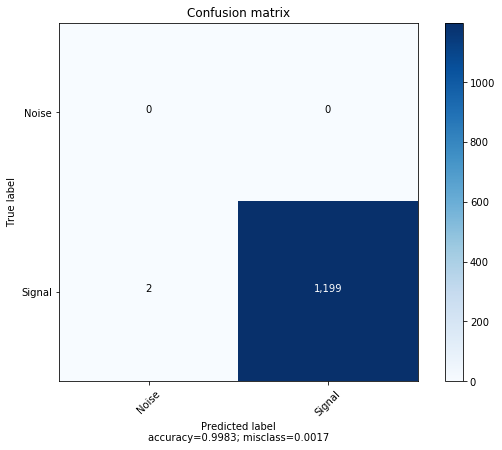

In [59]:
def build_improved_model():
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', kernel_initializer='uniform',input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1024,kernel_initializer='uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    optimizer = keras.optimizers.SGD(lr=0.3, momentum=0.9)
#    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

model=build_improved_model()
plotlosses = PlotLossesKerasTF()
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
model_checkpoint = keras.callbacks.ModelCheckpoint("script_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)

history = model.fit(train_set.values, train_labels.values, batch_size = 100, verbose = 1, epochs=50, validation_data=(val_set.values, val_labels.values), callbacks=[plotlosses, model_checkpoint, early_stopping], shuffle=True)

model = keras.models.load_model("script_checkpoint.h5")

pred_labels = model.predict(scaled_positive.values)
pred_labels = (pred_labels > 0.5)
print_precision_recall(scaled_labels,pred_labels)
print_cm(scaled_labels,pred_labels)

### Migliorato ma di pochissimo. Aspetto i negativi per ragionarci...

---

### Proviamo con 10 % shifted

len y  822
len y  807
len y  872
len y  829
len y  817


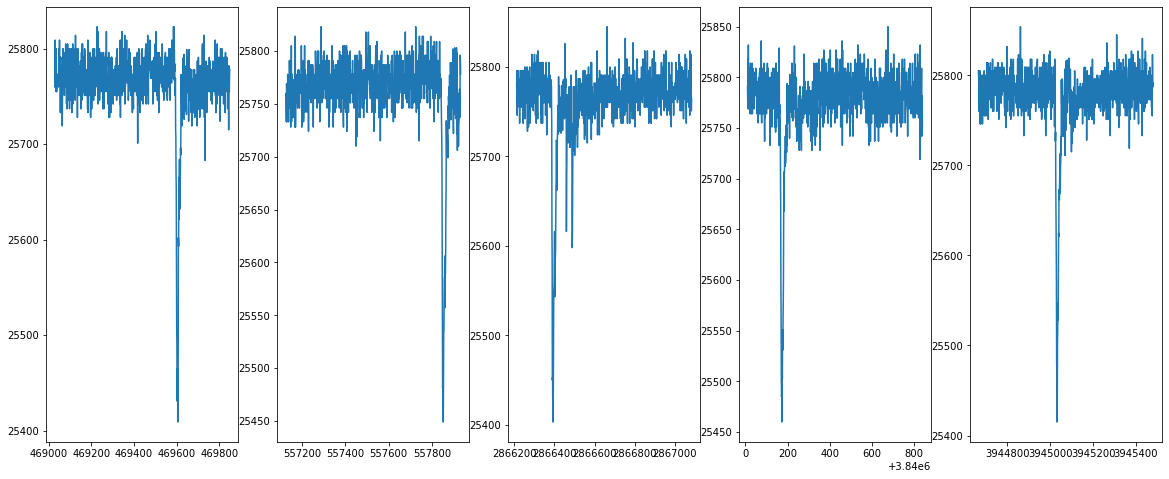

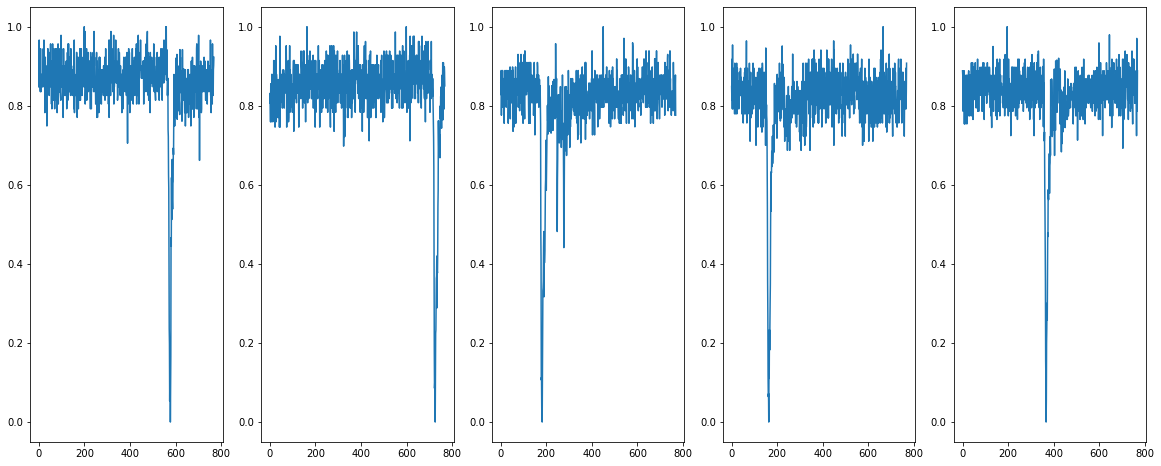

In [39]:
scaled_positive = uproot4.open("positivi_shifted_10.root")
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for item in scaled_positive.classnames():
    hist=scaled_positive[item]
    X_scaled=hist.to_numpy()[1]
    y_scaled=hist.to_numpy()[0]
    plt.subplot(index)
    plt.plot(X_scaled[:-1],y_scaled)
    print('len y ', len(y_scaled))
    index+=1
    count+=1
    if count==limit: break

list_of_hist = []
for item in scaled_positive.classnames():
    y_scaled=scaled_positive[item].to_numpy()[0]
    list_of_hist.append(y_scaled[0:769])

scaled_positive=pd.DataFrame(list_of_hist, index=None)

scaler2 = preprocessing.MinMaxScaler()
scaled_positive = pd.DataFrame(data = scaler2.fit_transform(scaled_positive.values.T).T, columns = scaled_positive.columns)
count=0
index=151
limit=5
plt.figure(figsize=[20,8])
for isto in range(0,2000):
    plt.subplot(index)
    plt.plot(scaled_positive.loc[isto])
    index+=1
    count+=1
    if count==limit: break

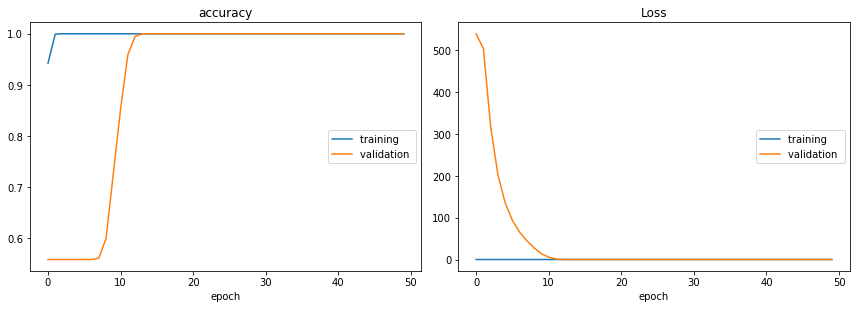

accuracy
	training         	 (min:    0.942, max:    1.000, cur:    1.000)
	validation       	 (min:    0.558, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.070, cur:    0.000)
	validation       	 (min:    0.000, max:  539.349, cur:    0.000)
1547/1547 [==============================] - 1s 343us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Accuracy: 0.81

Micro Precision: 0.81
Micro Recall: 0.81
Micro F1-score: 0.81

Macro Precision: 0.50
Macro Recall: 0.41
Macro F1-score: 0.45

Weighted Precision: 1.00
Weighted Recall: 0.81
Weighted F1-score: 0.90


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


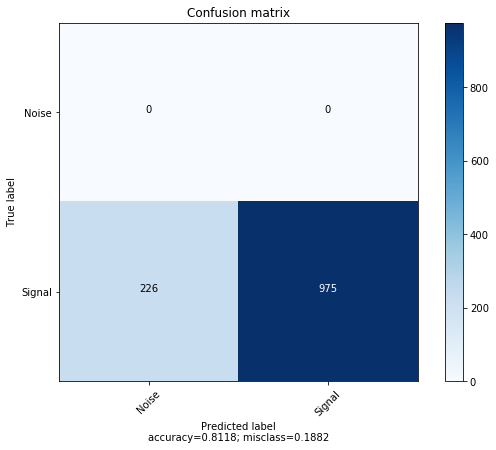

In [40]:
def build_improved_model():
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', kernel_initializer='uniform',input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1024,kernel_initializer='uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    optimizer = keras.optimizers.SGD(lr=0.3, momentum=0.9)
#    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

model=build_improved_model()
plotlosses = PlotLossesKerasTF()
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
model_checkpoint = keras.callbacks.ModelCheckpoint("script_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)

history = model.fit(train_set.values, train_labels.values, batch_size = 100, verbose = 1, epochs=50, validation_data=(val_set.values, val_labels.values), callbacks=[plotlosses, model_checkpoint, early_stopping], shuffle=True)

model = keras.models.load_model("script_checkpoint.h5")
pred_labels = model.predict(scaled_positive.values)
pred_labels = (pred_labels > 0.5)
print_precision_recall(scaled_labels,pred_labels)
print_cm(scaled_labels,pred_labels)

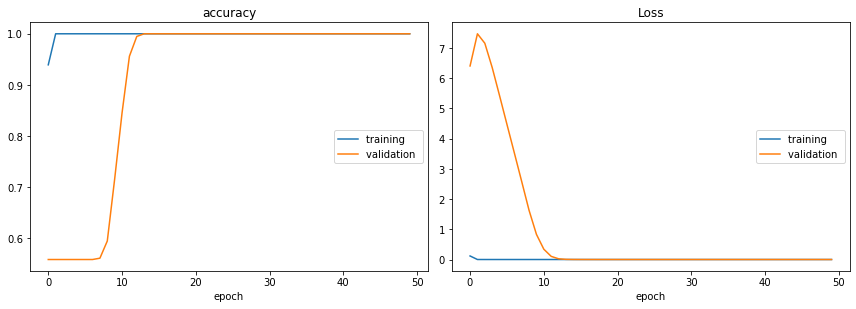

accuracy
	training         	 (min:    0.939, max:    1.000, cur:    1.000)
	validation       	 (min:    0.558, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.118, cur:    0.000)
	validation       	 (min:    0.000, max:    7.472, cur:    0.000)
1547/1547 [==============================] - 1s 350us/sample - loss: 1.5781e-05 - accuracy: 1.0000 - val_loss: 4.5492e-06 - val_accuracy: 1.0000

Accuracy: 0.00

Micro Precision: 0.00
Micro Recall: 0.00
Micro F1-score: 0.00

Macro Precision: 0.50
Macro Recall: 0.00
Macro F1-score: 0.00

Weighted Precision: 1.00
Weighted Recall: 0.00
Weighted F1-score: 0.00


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


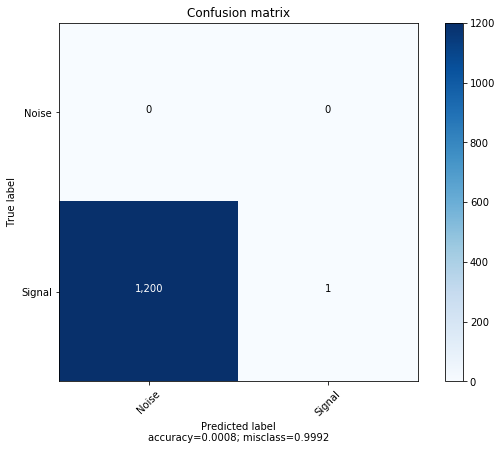

In [41]:
def build_baseline_model():
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    filters = 80
    kernel_size=200
    subsample_length = 2
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=256,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=128,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

model=build_baseline_model()
plotlosses = PlotLossesKerasTF()
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
model_checkpoint = keras.callbacks.ModelCheckpoint("script_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)

history = model.fit(train_set.values, train_labels.values, batch_size = 100, verbose = 1, epochs=50, validation_data=(val_set.values, val_labels.values), callbacks=[plotlosses, model_checkpoint, early_stopping], shuffle=True)

model = keras.models.load_model("script_checkpoint.h5")
pred_labels = model.predict(scaled_positive.values)
pred_labels = (pred_labels > 0.5)
print_precision_recall(scaled_labels,pred_labels)
print_cm(scaled_labels,pred_labels)

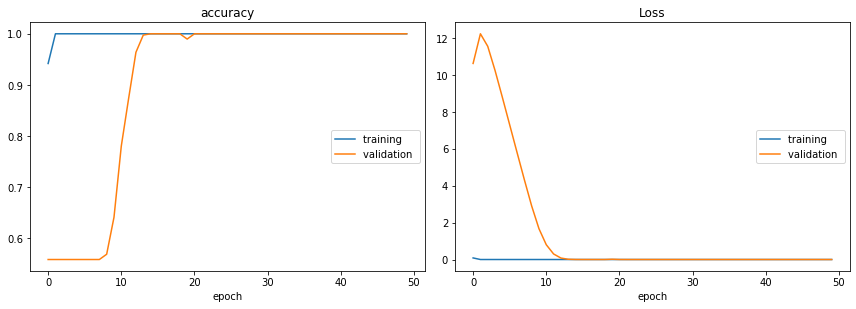

accuracy
	training         	 (min:    0.942, max:    1.000, cur:    1.000)
	validation       	 (min:    0.558, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.086, cur:    0.000)
	validation       	 (min:    0.000, max:   12.226, cur:    0.000)
1547/1547 [==============================] - 1s 384us/sample - loss: 3.0722e-09 - accuracy: 1.0000 - val_loss: 1.6907e-12 - val_accuracy: 1.0000

Accuracy: 0.00

Micro Precision: 0.00
Micro Recall: 0.00
Micro F1-score: 0.00

Macro Precision: 0.50
Macro Recall: 0.00
Macro F1-score: 0.00

Weighted Precision: 1.00
Weighted Recall: 0.00
Weighted F1-score: 0.01


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


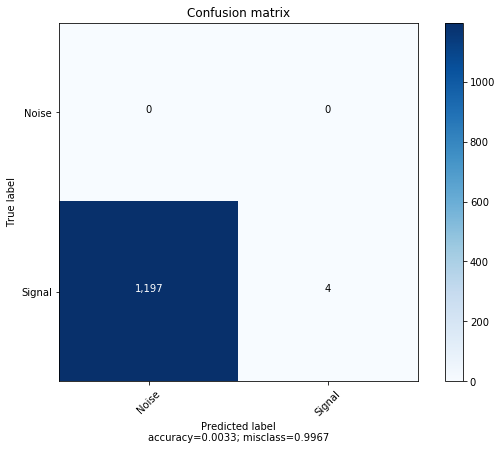

In [43]:
def build_manual_model():
    keras.backend.clear_session()
    tf.random.set_seed(0)
    np.random.seed(0)
    model=None
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=512,activation='relu', input_shape=(train_set.shape[1],)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1024,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

model=build_manual_model()
plotlosses = PlotLossesKerasTF()
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
model_checkpoint = keras.callbacks.ModelCheckpoint("script_checkpoint.h5", monitor='val_loss', mode='min', verbose=0, save_best_only=True)

history = model.fit(train_set.values, train_labels.values, batch_size = 100, verbose = 1, epochs=50, validation_data=(val_set.values, val_labels.values), callbacks=[plotlosses, model_checkpoint, early_stopping], shuffle=True)

model = keras.models.load_model("script_checkpoint.h5")
pred_labels = model.predict(scaled_positive.values)
pred_labels = (pred_labels > 0.5)
print_precision_recall(scaled_labels,pred_labels)
print_cm(scaled_labels,pred_labels)

----

In [42]:
clf=RandomForestClassifier(n_estimators=1000, n_jobs=10, random_state=42)
clf.fit(train_set,train_labels)
preds=clf.predict(test_set)

In [43]:
print_precision_recall(test_labels, preds)


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


In [44]:
preds=clf.predict(scaled_positive)
preds = (preds > 0.5)
scaled_labels=np.ones(1201)

In [45]:
print_precision_recall(scaled_labels, preds)


Accuracy: 0.00

Micro Precision: 0.00
Micro Recall: 0.00
Micro F1-score: 0.00

Macro Precision: 0.00
Macro Recall: 0.00
Macro F1-score: 0.00

Weighted Precision: 0.00
Weighted Recall: 0.00
Weighted F1-score: 0.00


/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/domenico/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
